# Determining the Optimum Portfolio Containing the Big US Tech Companies and its Future Return

**Description of Project:** 

This project was undertaken to gain a greater understanding of how Python can be used in finance and to improve the authors  understanding of Python and financial concepts. This project does not offer financial advice.

The project shows how Yahoos Finance API can be used to import companies’ financial data in to a Python program and then analysed. The financial data is then analysed to determine a stocks historical return and risk level before Markowitz Portfolio is used to determine the optimal portfolio contining six US Tech stocks.

This Project covers the following areas:

Python including:

    Pandas
    Numpy
    Random Number Generation
    Matplotlib
    
Financial Topics and Other Areas including:

    Simple Returns
    Log Returns
    Arithmetic Mean
    Geometric Return
    Investment Risk
    Variance
    Standard Deviation
    Covariance
    Correlation
    Markowitz Portfolio Model

Import the Python Libraries Required

In [81]:
# Matplotlib will be used to produce graphs of the data
import matplotlib.pyplot as plt

# Numpy will be used for mathematical computation and to allow us to work with multidimensional arrays
import numpy as np

# Pandas will be used to allow us to work with dataframes and to manipulate the data more easily
import pandas as pd

# We will use Pandas DataReader to retrieve data from the Yahoo Finance API
from pandas_datareader import data as wb

# We will use the random module to assign different weights of stocks in our portfolio
import random

In [82]:
# Importing financial Data for Amazon, Apple, Netflix, Google and Microsoft using the Yahoo finance API
tickers = ['AMZN', 'AAPL', 'NFLX', 'GOOG', 'MSFT']

# Create an Empty Dataframe to populate with the Stock price for the companies listed
tech_data = pd.DataFrame()

# Populate the dataframe with the companies Daily Adjusted Close price from 01/01/2005 to the 01/01/2015
for t in tickers:
    tech_data[t] = wb.DataReader(t, data_source='yahoo', start = '2005-01-01', end = '2015-01-01')['Adj Close']
    
# Facebook will be done separately as the IPO did not occur until 2012 and so there is no data
# for the period from 2005 to 2011

# Populate a series with Facebooks Daily Adjusted Close price from 01/01/2005 to the 01/01/2015
fb_data = wb.DataReader('FB', data_source='yahoo', start = '2005-01-01', end = '2015-01-01')['Adj Close']



In [83]:
tech_data.tail()

,AMZN,AAPL,NFLX,GOOG,MSFT
Date,,,,,
2014-12-24,303.029999,102.395844,48.871429,527.322266,42.980671
2014-12-26,309.089996,104.205940,48.578571,532.567810,42.748539
2014-12-29,312.040009,104.132797,48.847141,528.877991,42.364616
2014-12-30,310.299988,102.862099,49.032856,528.967712,41.980705
2014-12-31,310.350006,100.905785,48.801430,524.958740,41.471783


In [84]:
tech_data.head()

,AMZN,AAPL,NFLX,GOOG,MSFT
Date,,,,,
2005-01-03,44.520000,3.913571,1.702857,100.976517,19.293917
2005-01-04,42.139999,3.953765,1.665714,96.886841,19.366064
2005-01-05,41.770000,3.988392,1.600000,96.393692,19.322775
2005-01-06,41.049999,3.991483,1.578571,93.922951,19.301130
2005-01-07,42.320000,4.282110,1.588571,96.563057,19.243410


In [85]:
# Convert series containing FB Adj Close Price
fb_data = fb_data.to_frame()
# Rename Data frame column to FB
fb_data = fb_data.rename(columns={'Adj Close' : 'FB'})
fb_data.tail()

,FB
Date,
2014-12-24,80.769997
2014-12-26,80.779999
2014-12-29,80.019997
2014-12-30,79.220001
2014-12-31,78.019997


In [86]:
fb_data.head()

,FB
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


The data needed to determine the rate of return of the Tech Stocks is now available in the Notebook as two dataframes. One dataframe containing the adjusted close values for Facebook and another dataframe containing the adjusted close values for Amazon, Apple, Netflix, Google and Microsoft.

# Calculating Rate of Return

Rates of Return can be calculated by either simple rate of return or log return.

Simple rate of return is calculated by determining the difference in value of the stock between the two periods divided by the original value of the stock in the first period e.g.
$$ R= \left(\frac{X_1-X_0}{X_0}\right) \cdot100$$

This can be simplified to: $$ \left(\frac{X_1}{X_0} -1\right) \cdot100$$

We will first calculate the simple rate of return.

In [87]:
# Lets First see how the tech companies have performed relative to each other.

# The data is first normalised to 1 by dividing the rows in the data frame by the first row
tech_data_return = tech_data/tech_data.iloc[0]
tech_data_return.head()

,AMZN,AAPL,NFLX,GOOG,MSFT
Date,,,,,
2005-01-03,1.000000,1.000000,1.000000,1.000000,1.000000
2005-01-04,0.946541,1.010270,0.978188,0.959499,1.003739
2005-01-05,0.938230,1.019118,0.939597,0.954615,1.001496
2005-01-06,0.922057,1.019908,0.927013,0.930146,1.000374
2005-01-07,0.950584,1.094169,0.932886,0.956292,0.997382


In [88]:
# Calculating the simple rate of return FB
fb_data_return = fb_data/fb_data.iloc[0]
fb_data_return.head()

,FB
Date,
2012-05-18,1.000000
2012-05-21,0.890139
2012-05-22,0.810882
2012-05-23,0.837039
2012-05-24,0.863981


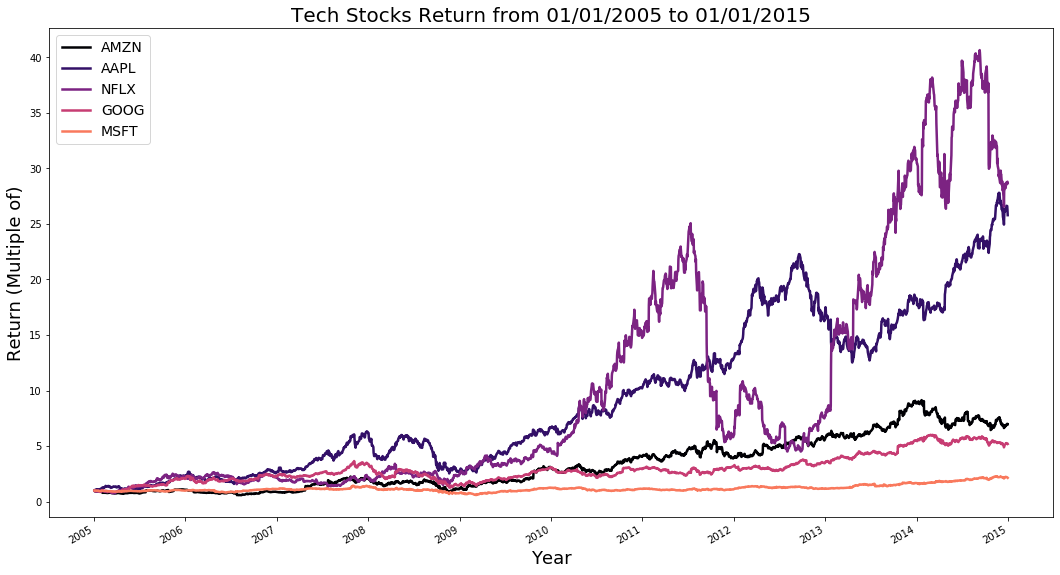

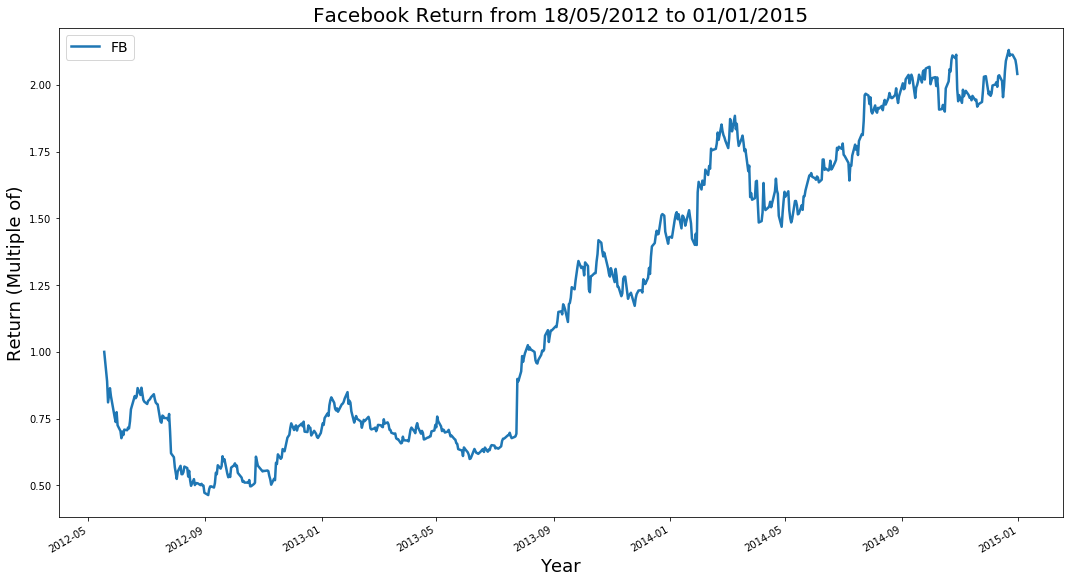

In [89]:
# After normalisation, the data can then be plotted on a line graph to indicate whether the value of the stock
# has increased or decreased. If the value of the stock has increased, we would see a value above 1 if the
# value of the stock has decreased we would see a value of less than 1 on the graph.


cmap = plt.get_cmap('magma')
colours = [cmap(x) for x in np.linspace(0, 0.9, 6)]

tech_data_return.plot(figsize = (18, 10), color = colours, linewidth = 2.5)
plt.legend(loc = 'upper left', fontsize =14)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Return (Multiple of)', fontsize = 18)
plt.title('Tech Stocks Return from 01/01/2005 to 01/01/2015', fontsize = 20)
plt.show()

fb_data_return.plot(figsize = (18, 10), linewidth = 2.5)
plt.legend(loc = 'upper left', fontsize =14)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Return (Multiple of)', fontsize = 18)
plt.title('Facebook Return from 18/05/2012 to 01/01/2015', fontsize = 20)
plt.show()

It can be seen that stock value of all the tech companies have increased over this period. We can see quite clearly that Apple and Netflix have outperformed Amazon, Google and Microsoft. But how has Facebook performed compared to these stocks. Lets plot the graphs side by side to do a visual comparison.

Text(0.5, 1.0, 'Facebook Return from 18/05/2012 to 01/01/2015 Comparison')

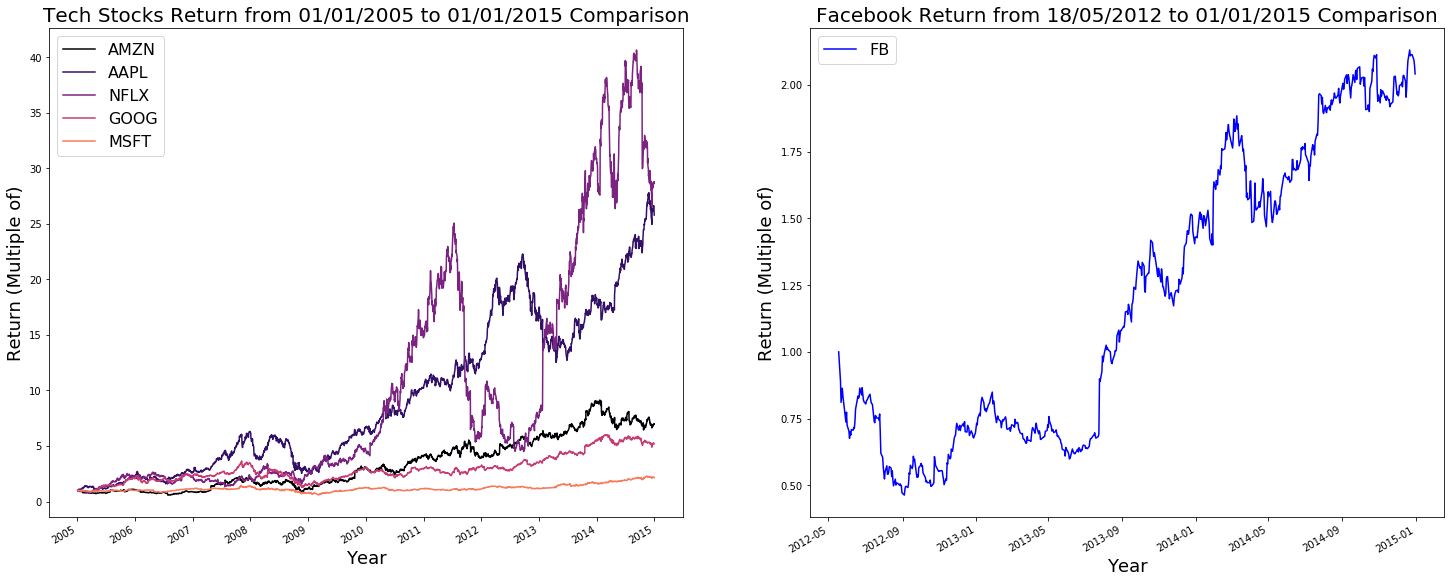

In [90]:
# Plot a figure containing two subplots. On subplot showing the Tech Stocks Return from 01/01/2005 to 01/01/2015 and
# another subplot showing FB stocks return from 18/05/2012 to 01/01/2015

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10));
ax1 = tech_data_return.plot(ax=axes[0], label = ['AMZN','AAPL','NFLX','GOOG', 'MSFT'], color = colours);
ax1.legend(loc = 'upper left', fontsize =16)
ax1.set_ylabel('Return (Multiple of)', fontsize = 18)
ax1.set_xlabel('Year', fontsize = 18)
ax1.set_title('Tech Stocks Return from 01/01/2005 to 01/01/2015 Comparison', fontsize = 20)

ax2 = fb_data_return.plot(ax=axes[1], label = 'FB', color ="b");
ax2.legend(loc = 'upper left', fontsize =16)
ax2.set_ylabel('Return (Multiple of)', fontsize = 18)
ax2.set_xlabel('Year', fontsize = 18)
ax2.set_title('Facebook Return from 18/05/2012 to 01/01/2015 Comparison', fontsize = 20)

It looks as though Facebook has performed as well as Apple and Netflix but if we look closer we can see that the axis between the two graphs are different and so we cannot perform an accurate comparison. Let;s plot the two graphs using the same axis.

Text(0.5, 1.0, 'Facebook Return from 18/05/2012 to 01/01/2015 Comparison Same Axis')

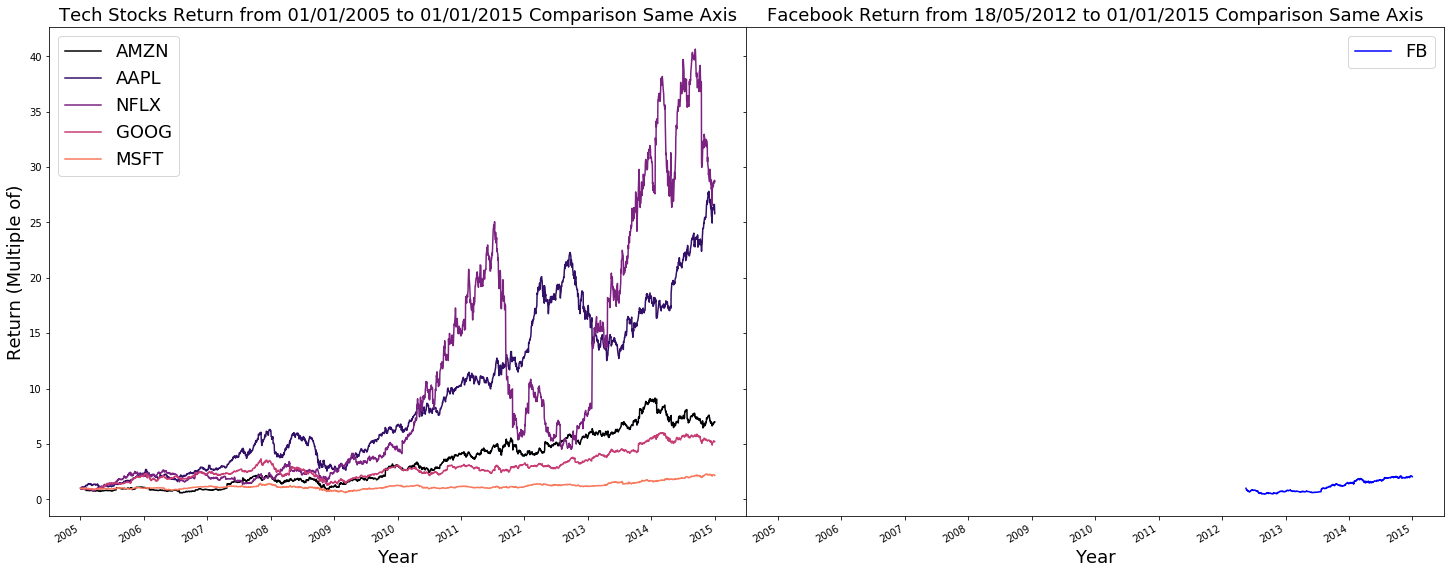

In [91]:
# Plot a figure containing two subplots. On subplot showing the Tech Stocks Return from 01/01/2005 to 01/01/2015 and
# another subplot showing FB stocks return from 18/05/2012 to 01/01/2015. This time we will use the same axis for
# both subplots so we can more easily visually inspect the performance of FB compared to the other tech stocks.

fig, axes = plt.subplots(1,2, sharex = True, sharey = True, figsize = (25, 10))
ax1 = tech_data_return.plot(ax = axes[0], label = ['AMZN','AAPL','NFLX','GOOG', 'MSFT'], color = colours)
ax1.legend(loc ='best', fontsize = 18)
ax2 = fb_data_return.plot(ax=axes[1], label = 'FB', color ="b")
ax2.legend(loc ='best', fontsize = 18)
plt.subplots_adjust(wspace=0, hspace = 0)
ax1.set_xlabel('Year', fontsize = 18)
ax2.set_xlabel('Year', fontsize = 18)
ax1.set_ylabel('Return (Multiple of)', fontsize = 18)
ax1.set_title('Tech Stocks Return from 01/01/2005 to 01/01/2015 Comparison Same Axis', fontsize = 18)
ax2.set_title('Facebook Return from 18/05/2012 to 01/01/2015 Comparison Same Axis', fontsize = 18)

We can now make a better of the performance between Facebook and the other Tech stocks. We can now see that Facebooks performance does not look as impressive as it did before. However, we don't have any data pre 2012 for Facebook as it was not listed on the stock market before this date. Let's compare the performance of Facebook with other tech stock dates since thw 18th of May 2012.


In [92]:
# Select the data from 28th of May 2012 untill the last row in the dataframe for the tech_data dataframe 
tech_data_from_2012 = tech_data.loc['2012-05-18':]
# Add the data from the fb_data dataframe to the tech_data_from_2012 dataframe
tech_data_from_2012 = tech_data_from_2012.join(fb_data)
tech_data_from_2012

,AMZN,AAPL,NFLX,GOOG,MSFT,FB
Date,,,,,,
2012-05-18,213.850006,65.592659,9.994286,299.078979,24.327055,38.230000
2012-05-21,218.110001,69.414101,10.248571,305.908386,24.726000,34.029999
2012-05-22,215.330002,68.881065,9.672857,299.278229,24.734301,31.000000
2012-05-23,217.279999,70.561768,10.272857,303.592072,24.194075,32.000000
2012-05-24,215.240005,69.913734,10.038571,300.702881,24.160828,33.029999
...,...,...,...,...,...,...
2014-12-24,303.029999,102.395844,48.871429,527.322266,42.980671,80.769997
2014-12-26,309.089996,104.205940,48.578571,532.567810,42.748539,80.779999
2014-12-29,312.040009,104.132797,48.847141,528.877991,42.364616,80.019997


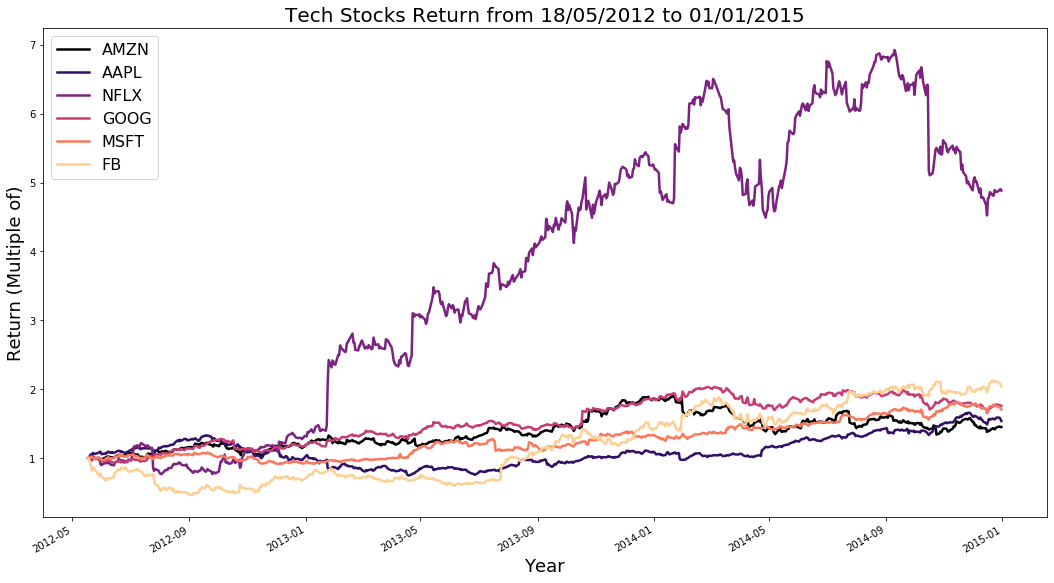

In [93]:
# Create a line chart to plot the performance of the tech stocks between the 18/05/2012 to 01/01/2015.

# The data is first normalised to 1 by dividing the rows in the data frame by the first row
tech_data_from_2012_return = tech_data_from_2012/tech_data_from_2012.iloc[0]
colours = [cmap(x) for x in np.linspace(0, 0.9, 6)]

# After normalisation, the data can then be plotted on a line graph to indicate whether the value of the stock
# has increased or decreased. If the value of the stock has increased, we would see a value above 1 if the
# value of the stock has decreased we would see a value of less than 1 on the graph.

tech_data_from_2012_return.plot(figsize = (18, 10), color = colours, linewidth= 2.5)
plt.legend(loc = 'upper left', fontsize =16)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Return (Multiple of)', fontsize = 18)
plt.title("Tech Stocks Return from 18/05/2012 to 01/01/2015", fontsize = 20)
plt.show()

Here is the performance of all the Tech Stocks we are interested in since May 2012. Netflix is still the standout performer however Apple no longer seems to be such a good performer. Facebook is actually the second-best performer of these tech stocks in the period of May 2012 to the 1st of Jan 2015.

We can see that the performance of the tech stocks appears to vary a lot depending on the time horizon that we look at. 

We will now determine the stocks average annual return. 

To determine the average annual return, we will determine the average daily return of these stocks and multiply it by the number of trading days in a year.

In [94]:
#SIMPLE Rate of Return per day

tech_data_simple_return = ((tech_data/tech_data.shift(1))-1)*100
tech_data_simple_return.mean()

AMZN    0.112422
AAPL    0.154187
NFLX    0.196327
GOOG    0.085018
MSFT    0.044970
dtype: float64

In [95]:
fb_data_simple_return = ((fb_data/fb_data.shift(1))-1)*100
fb_data_simple_return

,FB
Date,
2012-05-18,NaN
2012-05-21,-10.986139
2012-05-22,-8.903905
2012-05-23,3.225806
2012-05-24,3.218746
...,...
2014-12-24,0.198482
2014-12-26,0.012383
2014-12-29,-0.940830


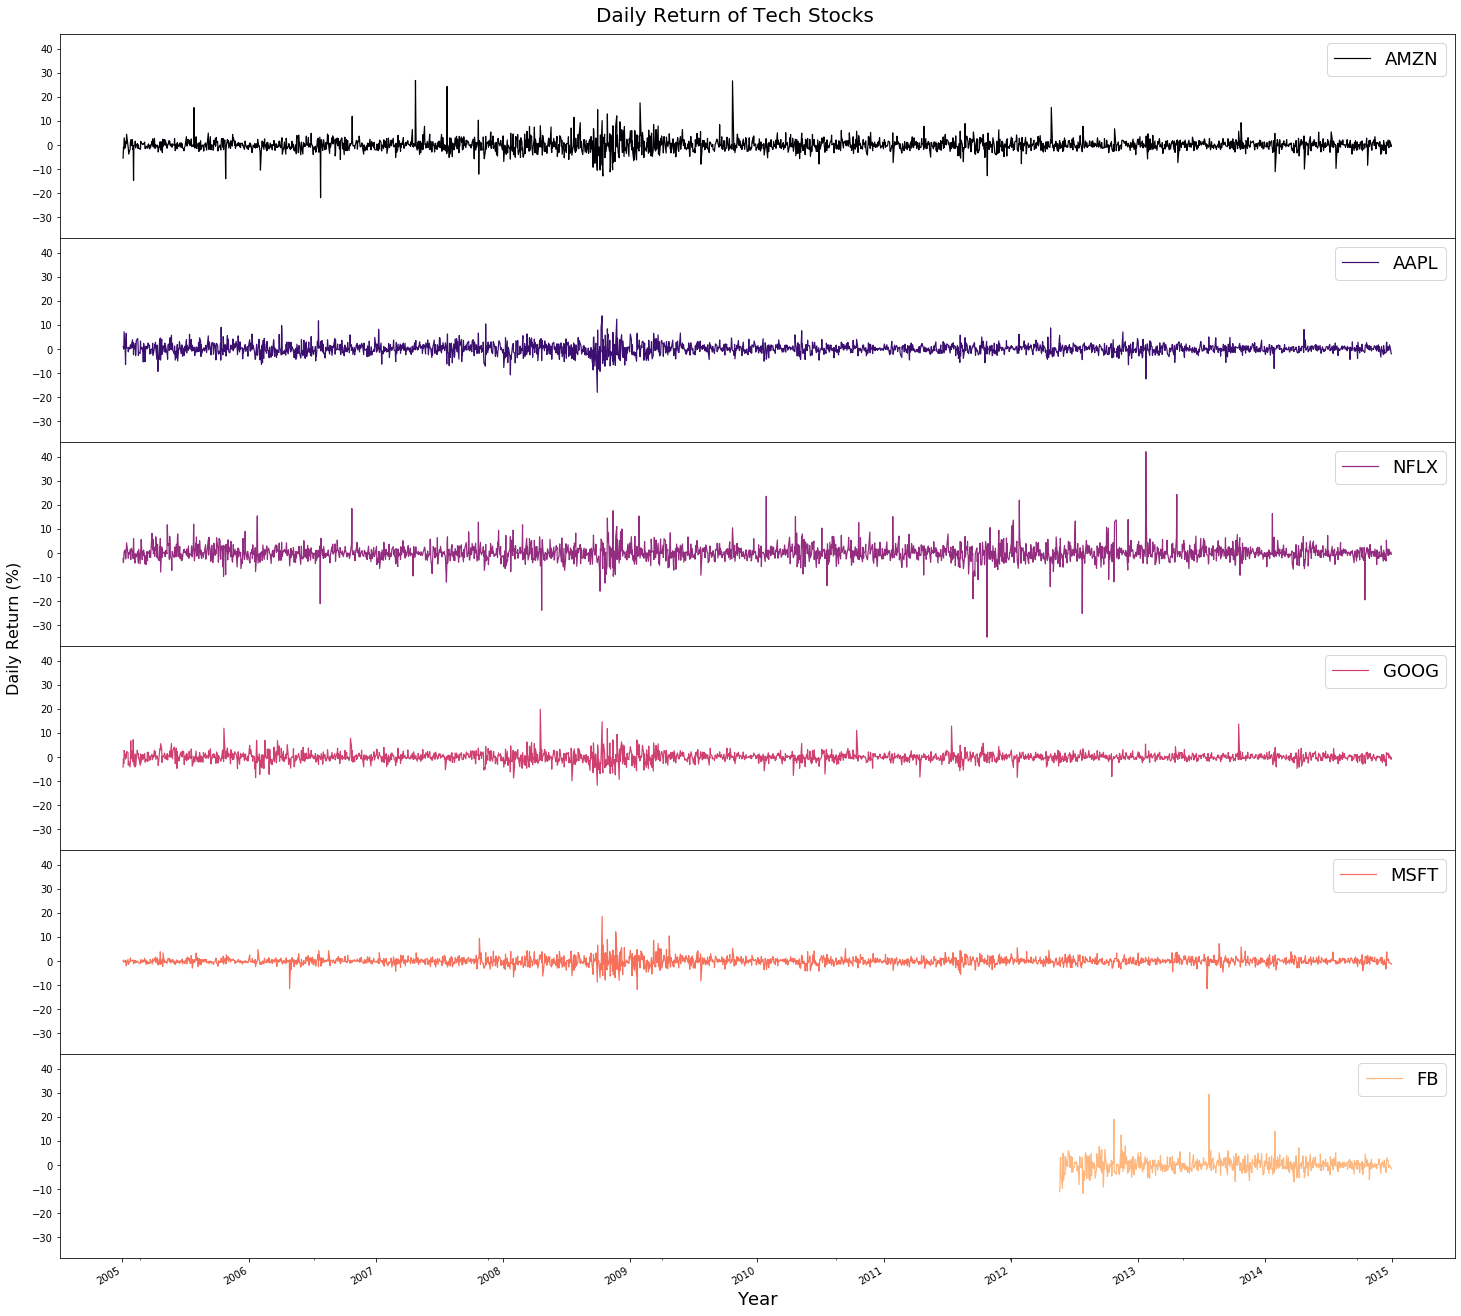

In [96]:
# Plot the daily returns on a graph to see how volatile each stock is.

label = ['AMZN','AAPL','NFLX','GOOG', 'MSFT', 'FB']

cmap = plt.get_cmap('magma')


day_return, axes = plt.subplots(6,1, sharex = True, sharey = True, figsize = (25, 25))
# Plot each subplot
l1 = tech_data_simple_return['AMZN'].plot(ax = axes[0], color = cmap(0), linewidth = 1.2)
l2 = tech_data_simple_return['AAPL'].plot(ax = axes[1], color = cmap(0.2), linewidth = 1.2)
l3 = tech_data_simple_return['NFLX'].plot(ax = axes[2], color = cmap(0.42), linewidth = 1.2)
l4 = tech_data_simple_return['GOOG'].plot(ax = axes[3], color = cmap(0.56), linewidth = 1.2)
l5 = tech_data_simple_return['MSFT'].plot(ax = axes[4], color = cmap(0.7), linewidth = 1.2)
l6 = fb_data_simple_return.plot(ax = axes[5], color = cmap(0.85), linewidth = 1.2)
# Add legend to each subplot
l1.legend(prop={'size' : 18})
l2.legend(prop={'size' : 18})
l3.legend(prop={'size' : 18})
l4.legend(prop={'size' : 18})
l5.legend(prop={'size' : 18})
l6.legend(prop={'size' : 18})
# Add axis Labels
plt.xlabel('Year', fontsize = 18)
day_return.text(0.1, 0.55, 'Daily Return (%)', ha='center', va='center', rotation='vertical', fontsize= 16)
day_return.text(0.5, 0.89, 'Daily Return of Tech Stocks', ha='center', va='center', rotation='horizontal', fontsize= 20)
plt.subplots_adjust(wspace=0, hspace = 0)

The daily returns graph above shows the volatility in the daily return of each stock. Microsoft is the least volatile stock and Netflix is the most volatile. 

In [97]:
# Determine the Average Yearly Return for each stock. Number of trading days in a year assumed to be 250.
tech_yearly_return = tech_data_simple_return.mean()*250
fb_yearly_return = fb_data_simple_return.mean()*250
# Combine the Two Series
tech_yearly_return = pd.concat([tech_yearly_return, fb_yearly_return], axis=0)
tech_yearly_return

AMZN    28.105625
AAPL    38.546727
NFLX    49.081631
GOOG    21.254592
MSFT    11.242414
FB      38.139915
dtype: float64

The annual returns calculated for tech stocks are quite phenomenal. Netflix was the strongest performer with an average annual return of 49.67% and Microsoft was the worst performer with an annual return of 11.38%. Let's look at how accurate these returns are:

In [98]:
# Let's calculate the value of the stocks we would expect with the average annual returns 
# we have calculated over a 10 year period.

# Microsoft

MSFT_AFT_10yr = 19.293 * 1.1124**10
print('Predicted value of a Microsoft share after 10 years is ' + str(MSFT_AFT_10yr))

# Netflix

NFLX_AFT_10yr = 1.703 * 1.4908**10
print('Predicted value of a Netflix share after 10 years is ' + str(NFLX_AFT_10yr))

Predicted value of a Microsoft share after 10 years is 55.97699314362074
Predicted value of a Netflix share after 10 years is 92.34395877742621


We can see that the values for the stock price of Microsoft and Netflix that we calculated using our average annual return value is much greater than the actual values after a 10-year period. The calculated value for Microsoft is 35% more than the actual value and the predicted value for Netflix is 89% more. The reason for this difference is because our calculated value uses the arithmetic mean and do not account for volatility.

For example consider two stocks both have an arithmetic mean return of 20%. Stock A in its first year has return of 1% in year 1 and a 39% return in year 2. Stock B has a return of 22% return in year 1 and a 18% return in year 2. Which stock is the better option?

Initial Investment of £100
                               
After 0 Years:                    Stock A = £100,       Stock B = £100.

After 1 Year:                     Stock A = £101,       Stock B = £122.

After 2 Years:                    Stock A = £140.39,    Stock B = £143.96.

Using the arithmetic mean return we would expect a value of £144 for both stock A and B. We can see that both stock A and B have underperformed compared to this expected return. Stock A which shows greater volatility has underperformed compared to Stock B.

This helps explain why the actual return for Microsoft and Netflix is less than that calculated using the annual average value we calculated. It also explains why the calculated expected value of the stock price for Netflix has greater difference than Microsoft when compared to the actual value, this is due to Netflix being more volatile than Microsoft. 



This shows that we need to consider the compounding that occurs from period to period. To do this we can use the geometric mean rather than the arithmetic mean.


Geometric rate of return can be calculated by:



$$ R= \left(\frac{Present Value}{Original Value}\right)^\frac{1}{N} -1$$

$$ N = Number of Periods$$



In [99]:
#Geometric Mean Annual Return
tech_yearly_return_Geo = ((((tech_data.iloc[-1]/tech_data.iloc[0])**(1/(10)))-1)*1)*100
fb_yearly_return_Geo = ((((fb_data.iloc[-1]/fb_data.iloc[0])**(1/(2.3)))-1)*1)*100
# Combine the Two Series
tech_yearly_return_Geo = pd.concat([tech_yearly_return_Geo, fb_yearly_return_Geo], axis=0)
tech_yearly_return_Geo


AMZN    21.431025
AAPL    38.399423
NFLX    39.870276
GOOG    17.920817
MSFT     7.952631
FB      36.362942
dtype: float64

These annual return values look more like what we were expecting. This shows the importance of knowing whether an average annual return value has been calculated using the arithmetic mean or geometric mean.

When determining the average return in a period over a multi-period session the geometric mean should be used. Alternatively, the log return could be calculated. The log return is similar to calculating the geometric mean return but when using the log return, we are assuming continuous compounding where as previously we had assumed discrete compounding over 'N' periods.

Log returns are calculated by:

$$ R= ln\left(\frac{P_t}{P_{t-1}}\right)$$


In [100]:
#Log Return (log in python is the natural log)
tech_log_return = np.log(tech_data.iloc[-1]/tech_data.iloc[0])
fb_log_return = np.log(fb_data.iloc[-1]/fb_data.iloc[0])
# Combine the Two Series
tech_log_return = pd.concat([tech_log_return, fb_log_return], axis=0)
tech_log_return

AMZN    1.941762
AAPL    3.249737
NFLX    3.355452
GOOG    1.648432
MSFT    0.765223
FB      0.713345
dtype: float64

In [101]:
# To test

AMZN_fut_val = 44.52 * np.exp(1.941762)
AMZN_fut_val

310.3499483415275

So, what can we conclude from this:

A) Finding the mean daily return and then multiplying it by the number of trading days is not a good indicator for average annual returns as it does not account for volatility in the stock price and so tends to overestimate.

B) We can use the geometric mean to determine average annual return over a period of x years.

C) We can use log returns to find the rate of return over and infinitely short period of time if the interest is being applied continuously.

It stands that Apple and Microsoft were the standout performers and have offered greater returns over this this period compared to the other stocks. However, we can see that in 2011 Netflix lost significant value and Apples stock price dramatically reduced in 2013.  

# Risk


Risk is the chance that an outcome or investment's actual gains will differ from an expected outcome or return. This includes the possibility of losing some or all of an original investment. The difference is the variability between what the predicted return is and what the actual return achieved is.


Measuring investment risk:

Variance and standard deviation are commonly used to quantify the dispersion of the predicted outcome.

Variance measures the dispersion of of a set of data points around the mean.

$$ S^2= \frac{\sum{\left(X-\bar{X}\right)^2}}{N-1}$$

Standard deviation is equal to the square root of the variance.

$$ S = \sqrt{S^2} $$

To determine the variance, we need to calculate the average daily return. We can use the log return for this. Determining the daily return can be done in two ways.

In [102]:
# Way 1

# Take the log return from the start of period (18/05/2012 for FB) to the end of the period (31/12/2014) and divide
# it by the number of trading days in this period and multiply it by the number of trading days in a year.

((np.log(fb_data.iloc[-1]/fb_data.iloc[0]))/659)*250

FB    0.270616
dtype: float64

In [103]:
# Way 2

# Determine the log return from one day to the next and multiply it by the number of trading days in a year (250)
fb_data_test = np.log(fb_data/fb_data.shift(1))
annual_fb_mean = fb_data_test.mean()*250
annual_fb_mean

FB    0.271028
dtype: float64

In [104]:
# We could then use this mean value in the standard deviation equation alternatively there is a built in 
# standard deviation function in python.

daily_fb_stdev= fb_data_test.std()
# The following is performed to annualise the standard deviation
annual_fb_stdev = fb_data_test.std() * 250**0.5

In [105]:
# Lets determine the mean annual return and standard deviation for the other tech stocks

tech_data_test = np.log(tech_data/tech_data.shift(1))
annual_tech_mean =tech_data_test.mean()*250
annual_tech_stdev = (tech_data_test.std() * 250**0.5)

In [106]:
# Combine the two Series for FB and the other Tech Stocks
annual_tech_mean = pd.concat([annual_tech_mean, annual_fb_mean], axis=0)
annual_tech_stdev = pd.concat([annual_tech_stdev, annual_fb_stdev], axis=0)
print(annual_tech_mean, annual_tech_stdev)

AMZN    0.192941
AAPL    0.322907
NFLX    0.333411
GOOG    0.163795
MSFT    0.076036
FB      0.271028
dtype: float64 AMZN    0.418557
AAPL    0.353286
NFLX    0.561478
GOOG    0.311561
MSFT    0.269648
FB      0.466816
dtype: float64


In [107]:
# Create a dataframe to show the annual return of the tech stocks and their standard deviation
annual_return_and_stdev = pd.DataFrame()
annual_return_and_stdev['Return'] = annual_tech_mean*100
annual_return_and_stdev['STDEV'] = annual_tech_stdev*100
#annual_return_and_stdev.rest_index
annual_return_and_stdev

,Return,STDEV
AMZN,19.294139,41.855746
AAPL,32.290709,35.328585
NFLX,33.341138,56.147810
GOOG,16.379488,31.156054
MSFT,7.603571,26.964788
FB,27.102759,46.681558


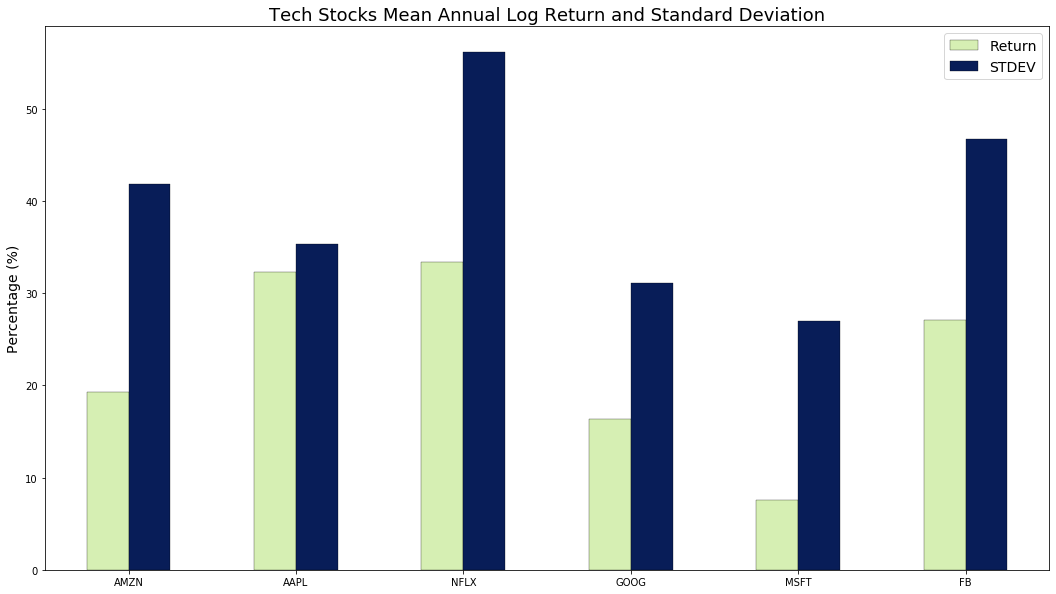

In [108]:
# Plot a bar chart to show the annual return of the tech stocks and their standard deviation
cmap = plt.get_cmap('YlGnBu')
colors = [cmap(x) for x in np.linspace(0.2, 1, 2)]
ax = annual_return_and_stdev.plot.bar(figsize = (18, 10), rot=0, color = colors, edgecolor = 'black',
        linewidth = 0.3)
ax.set_ylabel('Percentage (%)', fontsize = 14)
ax.set_title('Tech Stocks Mean Annual Log Return and Standard Deviation', fontsize = 18)
ax.legend(fontsize = 14)

From this graph we can see Netflix and Apple were the best performers and had similar annual returns. However, we can see that Netflix had a much larger standard deviation than Apple and so we can say it carried more risk. 

# Measuring the relationship between Stocks


We can quantify the relationship between stocks by calculating their covariance.


$$ \sigma_{xy}= \frac{\left(x-\bar{x}\right)\left(y-\bar{y}\right)}{n-1}$$

If covariance > 0 The two variables move together in the same direction

If covariance < 0 The two variables a move inversely to each other

If covariance = 0 The two variables are independent

However, although covariance does measure the directional relationship between assets, it does not show the strength of the relationship between the assets; the coefficient of correlation is a more appropriate indicator of this strength.

The correlation coefficient is a measure of the strength of the relationship between the realative movements of variables. The coefficient can range from -1 to 1. A correlation of 1 shows a perfect positive correlation e.g. means the  entire variability of the second variable is explained by the first variable. -1 shows perfect negative correlation. Correlation of 0 shows there is no correlation between the two variables. 

In [109]:
# Display the mean daily log return of the tech stocks
tech_data_test

,AMZN,AAPL,NFLX,GOOG,MSFT
Date,,,,,
2005-01-03,NaN,NaN,NaN,NaN,NaN
2005-01-04,-0.054941,0.010218,-0.022053,-0.041344,0.003732
2005-01-05,-0.008819,0.008720,-0.040250,-0.005103,-0.002238
2005-01-06,-0.017388,0.000775,-0.013483,-0.025966,-0.001121
2005-01-07,0.030469,0.070283,0.006315,0.027721,-0.002995
...,...,...,...,...,...
2014-12-24,-0.010701,-0.004721,0.016713,-0.003436,-0.006419
2014-12-26,0.019801,0.017523,-0.006010,0.009898,-0.005415
2014-12-29,0.009499,-0.000702,0.005513,-0.006952,-0.009022


In [110]:
# Display the mean daily log return of FB stock
fb_data_test

,FB
Date,
2012-05-18,NaN
2012-05-21,-0.116378
2012-05-22,-0.093255
2012-05-23,0.031749
2012-05-24,0.031680
...,...
2014-12-24,0.001983
2014-12-26,0.000124
2014-12-29,-0.009453


In [111]:
# Calculate the Covariance between the stocks using the .cov() python method
cov_matrix = tech_data_test.cov()
cov_matrix

,AMZN,AAPL,NFLX,GOOG,MSFT
AMZN,0.000701,0.000241,0.000299,0.000242,0.000197
AAPL,0.000241,0.000499,0.000182,0.000217,0.000158
NFLX,0.000299,0.000182,0.001261,0.000157,0.000138
GOOG,0.000242,0.000217,0.000157,0.000388,0.000157
MSFT,0.000197,0.000158,0.000138,0.000157,0.000291


In [112]:
# We can check this matrix by using the python command to measure variance for Amazon and check it against the 
# covariance matrix
tech_data_test['AMZN'].var()

0.0007007613764736711

The variance of the amazon stock matches the covariance matrix as expected. 

In [113]:
# However, this covariance matrix does not include Facebook. To include Facebook we will have to remove the data in the 
# tech_data test set prior to the 18/05/2018. We have chosen the 19th of May so that there are no rows in the dataframe
# with a value 'NaN'

tech_data_test_FB = tech_data_test.loc['2012-05-19':].copy()
tech_data_test_FB

,AMZN,AAPL,NFLX,GOOG,MSFT
Date,,,,,
2012-05-21,0.019725,0.056626,0.025125,0.022578,0.016266
2012-05-22,-0.012828,-0.007709,-0.057815,-0.021912,0.000336
2012-05-23,0.009015,0.024107,0.060181,0.014311,-0.022083
2012-05-24,-0.009433,-0.009226,-0.023070,-0.009562,-0.001375
2012-05-25,-0.010978,-0.005374,-0.000712,-0.020299,-0.000344
...,...,...,...,...,...
2014-12-24,-0.010701,-0.004721,0.016713,-0.003436,-0.006419
2014-12-26,0.019801,0.017523,-0.006010,0.009898,-0.005415
2014-12-29,0.009499,-0.000702,0.005513,-0.006952,-0.009022


In [114]:
# Add Facebook Data to the dataframe
tech_data_test_FB ['FB'] = fb_data_test.loc['2012-05-19':]
tech_data_test_FB

,AMZN,AAPL,NFLX,GOOG,MSFT,FB
Date,,,,,,
2012-05-21,0.019725,0.056626,0.025125,0.022578,0.016266,-0.116378
2012-05-22,-0.012828,-0.007709,-0.057815,-0.021912,0.000336,-0.093255
2012-05-23,0.009015,0.024107,0.060181,0.014311,-0.022083,0.031749
2012-05-24,-0.009433,-0.009226,-0.023070,-0.009562,-0.001375,0.031680
2012-05-25,-0.010978,-0.005374,-0.000712,-0.020299,-0.000344,-0.034497
...,...,...,...,...,...,...
2014-12-24,-0.010701,-0.004721,0.016713,-0.003436,-0.006419,0.001983
2014-12-26,0.019801,0.017523,-0.006010,0.009898,-0.005415,0.000124
2014-12-29,0.009499,-0.000702,0.005513,-0.006952,-0.009022,-0.009453


In [115]:
# Calculate Covariance of the Tech stocks including FB

cov_matrix_FB = tech_data_test_FB.cov()
cov_matrix_FB

,AMZN,AAPL,NFLX,GOOG,MSFT,FB
AMZN,0.000338,0.000048,0.000196,0.000112,0.000064,0.000132
AAPL,0.000048,0.000275,0.000003,0.000053,0.000044,0.000057
NFLX,0.000196,0.000003,0.001269,0.000124,0.000070,0.000125
GOOG,0.000112,0.000053,0.000124,0.000182,0.000066,0.000095
MSFT,0.000064,0.000044,0.000070,0.000066,0.000191,0.000043
FB,0.000132,0.000057,0.000125,0.000095,0.000043,0.000872


We can see from the covariance matrix that there is a positive directional relationship between all the Tech stocks. To measure the strength of the relationship we need to determine the coefficient of correlation.

$$ \rho_{xy}= \frac{Cov\left(x,y\right)}{\sigma_x\sigma_y}$$

In [116]:
# To measure the correlation we are going to use the .corr method.
corr_matrix_FB = tech_data_test_FB.corr()
corr_matrix_FB

,AMZN,AAPL,NFLX,GOOG,MSFT,FB
AMZN,1.000000,0.158881,0.298962,0.450578,0.251479,0.243504
AAPL,0.158881,1.000000,0.005316,0.237662,0.190157,0.116604
NFLX,0.298962,0.005316,1.000000,0.258243,0.141377,0.118557
GOOG,0.450578,0.237662,0.258243,1.000000,0.351761,0.238231
MSFT,0.251479,0.190157,0.141377,0.351761,1.000000,0.105189
FB,0.243504,0.116604,0.118557,0.238231,0.105189,1.000000


This correlation matrix shows the correlation of returns between the tech stocks. None of the tech stocks show a strong correlation to each other. The strongest correlation in returns is between Amazon and Google with a correlation coefficient of 0.45. However, we can conclude that the returns of all the tech stocks are weakly correlated. 

# Markowitz Portfolio Optimization

Markowitz Portfolio Optimization is a theory presented by Harry Markowitz that outlines how investors should construct a portfolio to minimise risk and optimise the expected return. 

Markowitz proposed there is a set a set of portfolios that lie on the efficient frontier. Portfolios that are situated on the efficient frontier are portfolios which offer the greatest return for a given level of risk. These portfolios are considered  the most efficient.

To calculate the risk associated of a given portfolio the variance of each asset and the correlation between the assets.

Calculate the efficient frontier for the Tech stocks

In [117]:
# To calculate the efficient frontier for the 6 tech stocks in our study we will need to create may dummy portfolios each
# different weights of the 6 tech stocks. These portfolios can then be plotted on a graph so we can visualise the efficient 
#frontier. However, first we will attempt to create one portfolio containing random wights of the tech stocks.



# Calculate the number of Stocks in our portfolio ( the +1 is to include FB)
num_stocks = len(tickers) + 1

# Calculate Random Weights for these 6 assets within our Portfolio (Mean Log returns stored 
# in annual_return_and_stdev['Return'])

weights = np.random.random(num_stocks)
weights /= np.sum(weights)
print('This portfolio is weighted as follows:'
      '\nAMZN', weights[0],
      '\nAAPL', weights[1],
      '\nNFLX', weights[2],
      '\nGOOG', weights[3],
      '\nMSFT', weights[4],
      '\nFB  ', weights[5])


This portfolio is weighted as follows:
AMZN 0.15548121156807942 
AAPL 0.1915541044084127 
NFLX 0.2036546082119866 
GOOG 0.3311296940152843 
MSFT 0.11168074009765441 
FB   0.006499641698582784


In [118]:
# Calculate Portfolio Expected Return

annual_portfolio_return = np.sum(annual_return_and_stdev['Return']*weights)

# Calculate Expected Portfolio Variance
annual_portfolio_Variance = np.dot(weights.T, np.dot(cov_matrix_FB * 250, weights))

# Calculate Expected Portfolio Volatility
annual_portfolio_Volatility = (np.dot(weights.T, np.dot(cov_matrix_FB * 250, weights))**0.5)*100
print('Expected Portfolio Return ',annual_portfolio_return)
print('Expected Portfolio Variance ',annual_portfolio_Variance)
print('Expected Portfolio Volatility ',annual_portfolio_Volatility)


Expected Portfolio Return  22.424435837003674
Expected Portfolio Variance  0.03925413637991342
Expected Portfolio Volatility  19.81265665677206


In [119]:
# Now we know how to create a randomly weighted portfolio and calculate its risk and return we will create multiple
# randomly weighted portfolios and record the portfolios return and volatility in a dataframe.

# Generate 100000 iterations of the portfolio with different weights assigned to the stocks

# Generate two empty lists to store the expected portfolio returns and volatilities from the iterations

portfolio_returns = []
portfolio_volatility = []
return_vol_ratio = np.zeros(100000)
all_weights = []

for x in range (100000):
    # Calaculate Random Weights for these 6 assets within our Portfolio
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)
    all_weights.append(weights)
    portfolio_returns.append((np.sum(annual_return_and_stdev['Return']*weights))/100)
    portfolio_volatility.append(np.dot(weights.T, np.dot(cov_matrix_FB * 250, weights))**0.5)
    return_vol_ratio[x] = portfolio_returns[x]/portfolio_volatility[x]

# Convert output from lists to numpy arrays
portfolio_returns = np.array(portfolio_returns)
portfolio_volatility = np.array(portfolio_volatility)
return_vol_ratio = np.array(return_vol_ratio)
all_weights = np.array(all_weights)

# Create Dataframe with to columns for the portfolios returns and volatilities
portfolios = pd.DataFrame({'Return':portfolio_returns, 'Volatility':portfolio_volatility})
portfolios

,Return,Volatility
0,0.248910,0.215510
1,0.184979,0.168483
2,0.227567,0.189939
3,0.218550,0.207859
4,0.233700,0.247267
...,...,...
99995,0.219472,0.220798
99996,0.223499,0.175014
99997,0.209999,0.180930
99998,0.214303,0.194360


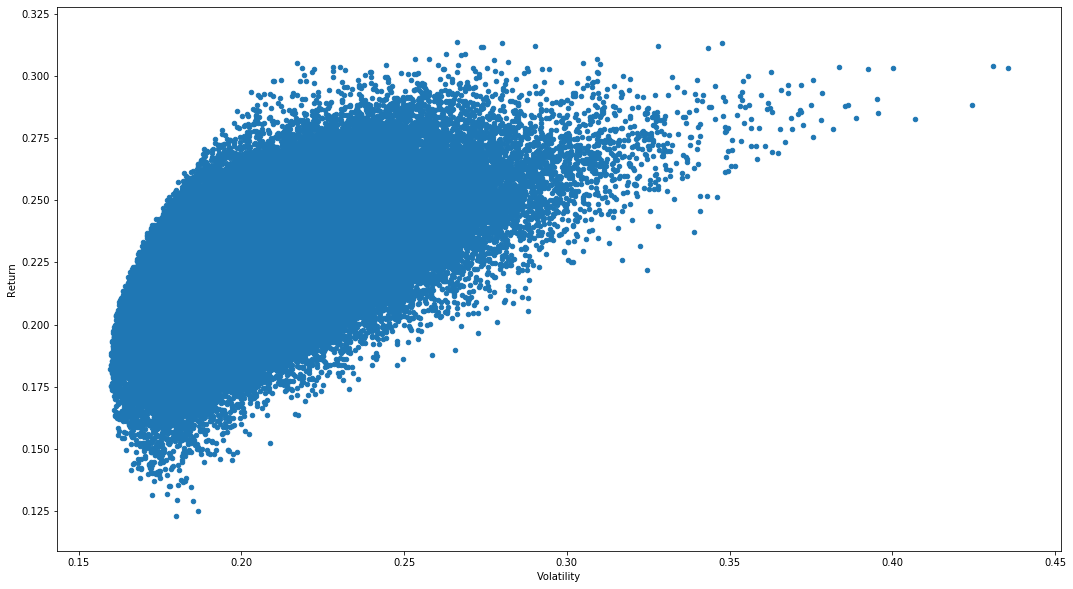

In [120]:
# To visualise the efficient frontier  the dataframe we just created will be used to plot a scatter graph the 
# portfolios expected return plotted on the y axis and the volatility plotted on the x axis.

# Plot the efficient  Frontier.
portfolios.plot(x= 'Volatility', y = 'Return', kind = 'scatter',figsize = (18, 10))

Above Shows us the efficient frontier of our potential portfolio. It shows us which portfolio provides us with the 
greatest return for that level of risk. However, this graph makes it hard to determine which portfolio gives us the highest return for the smallest amount of risk. We will adjust this graph to identify which portfolios offer the greatest return for the smallest amount of risk.

In [121]:
# Find the allocation of the weights in the portfolios that offer:
# A) the greatest return to volatility ratio 
# B) the greatest return
# C) the smallest return

# Find max return to risk ratio
return_vol_ratio.max()
# Find the simulation it occurred in
return_vol_ratio.argmax()
max_return_risk_ratio_stmt = 'Max ratio is {} this occurred in simulation {}'

# Find max return 
portfolio_returns.max()
# Find the simulation it occurred in
portfolio_returns.argmax()
max_return_stmt = '\nMax return is {} this occurred in simulation {}'

# Find min return 
portfolio_returns.min()
# Find the simulation it occurred in
portfolio_returns.argmin()
min_return_stmt = '\nMin return is {} this occurred in simulation {}'

print(max_return_risk_ratio_stmt.format(return_vol_ratio.max(), return_vol_ratio.argmax()),
     max_return_stmt.format(portfolio_returns.max(), portfolio_returns.argmax()),
     min_return_stmt.format(portfolio_returns.min(), portfolio_returns.argmin()) 
     )

Max ratio is 1.4452812555846888 this occurred in simulation 45925 
Max return is 0.31356497651849735 this occurred in simulation 7445 
Min return is 0.12315635017406276 this occurred in simulation 11672


In [122]:
# We will now obtain the coordinates of these portfolios on the return vs volatility graph

# Coordinates of point for the portfolio that offers the greatest return for the smallest amount of risk
max_ratio_ret = portfolio_returns[return_vol_ratio.argmax()]
max_ratio_vol = portfolio_volatility[return_vol_ratio.argmax()]
max_return_ret = portfolio_returns[portfolio_returns.argmax()]
max_return_vol = portfolio_volatility[portfolio_returns.argmax()]
min_return_ret = portfolio_returns[portfolio_returns.argmin()]
min_return_vol = portfolio_volatility[portfolio_returns.argmin()]

print(max_ratio_ret, max_ratio_vol,
     max_return_ret,max_return_vol,
     min_return_ret, min_return_vol)

0.2933411470910207 0.20296474887329075 0.31356497651849735 0.2663474820747092 0.12315635017406276 0.1799381008575054


Markers will be plotted on the graph so that we can identify the portfolios that offer us the greatest return (purple marker), the largest return to volatility ratio (light blue marker), and the lowest return (red marker).  

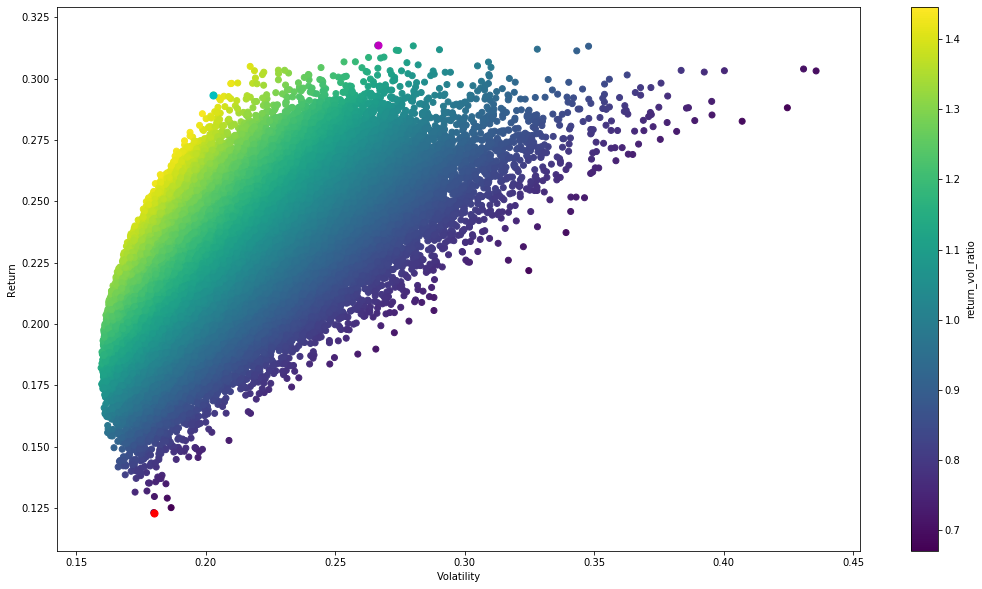

In [123]:
# The return Vs volatility graph will now be replotted with the coloured markers for the portfolios mentioned. We will 
# also add a colour scale to show the return to volatility ratio for all the other portfolios created in our simulation.

plt.figure(figsize=(18,10))
plt.scatter(portfolio_volatility, portfolio_returns, c= return_vol_ratio, cmap='viridis')
plt.colorbar(label='return_vol_ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


# Plot Cyan marker for the portfolio that offers greatest return for the smallest amount of risk
plt.scatter(max_ratio_vol, max_ratio_ret, c ='c', s=50)

# Plot magenta marker for the portfolio that offers greatest return
plt.scatter(max_return_vol, max_return_ret, c ='m', s=50)

# Plot red marker for the portfolio that offers greatest return for the smallest amount of risk
plt.scatter(min_return_vol, min_return_ret, c='red', s=50)
plt.show()

The weights of the tech stocks in the portfolios that offer the greatest return to volatility ratio, the greatest return and the smallest  reuturn will be obtained and held in a dataframe.

In [124]:
# Weights of Stocks in the portfolio with largest Ratio
max_return_vol_ratio_weights = all_weights[return_vol_ratio.argmax()]*100
# Weights of Stocks in the portfolio with greatest Return
max_return_weights = all_weights[portfolio_returns.argmax()]*100
# Weights of Stocks in the portfolio with smallest Return
min_return_weights = all_weights[portfolio_returns.argmin()]*100

# Combine the Portfolios into one array
portfolio_weights = np.vstack([max_return_vol_ratio_weights, max_return_weights, min_return_weights])

# Create a dataframe to display the weightings in the portfolio
portfolio_weights = pd.DataFrame(portfolio_weights, columns = ['AMZN', 'AAPL', 'NFLX', 'GOOG', 'MSFT', 'FB'])
portfolio_weights['Portfolio'] = (['Largest Return to Volatility Ratio', 'Largest Return', 'Smallest Return'])
portfolio_weights = portfolio_weights[['Portfolio', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'MSFT', 'FB']]
portfolio_weights


,Portfolio,AMZN,AAPL,NFLX,GOOG,MSFT,FB
0,Largest Return to Volatility Ratio,9.618404,59.807127,12.066205,8.092452,0.027198,10.388614
1,Largest Return,3.094587,48.625450,39.049532,1.039148,1.804730,6.386552
2,Smallest Return,6.804803,6.170281,1.224336,10.999881,69.093676,5.707023


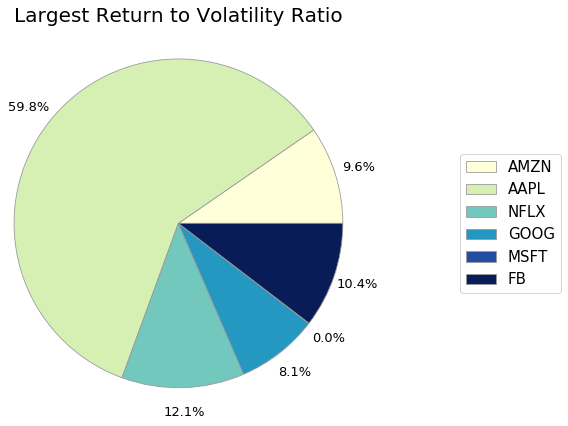

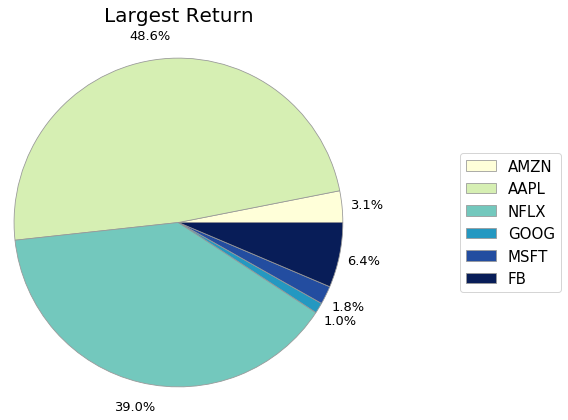

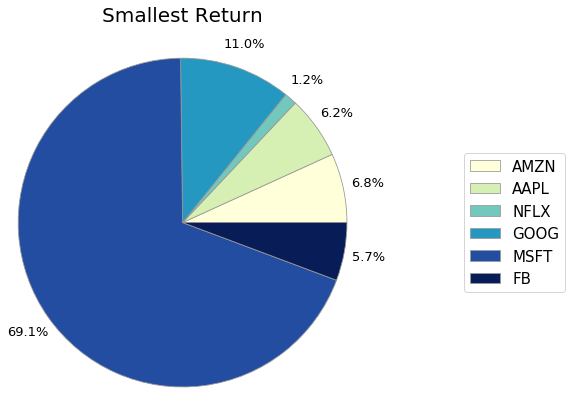

In [125]:
# Plot pie charts for each of the portfolios held in the dataframe to visualise the weight of the stocks in the three
# portfolios.

for i, row in portfolio_weights.iterrows():
    x_test = portfolio_weights.iloc[i,1:].tolist()
    # Colour to be used in Pie chart
    color= ['y','k','r','g','c','b']
    cmap = plt.get_cmap('YlGnBu')
    colors = [cmap(x) for x in np.linspace(0, 1, 6)]
    plt.figure(figsize=(100,6.3))
    plt.pie(x_test, radius = 1.2, autopct='%1.1f%%', pctdistance=1.15, textprops={'fontsize': 13}, colors= colors,
           wedgeprops={"edgecolor":"0.6",'linewidth': 0.8,
                          'linestyle': '-', 'antialiased': True})
    
    plt.title(portfolio_weights.iloc[i,0], fontsize = 20, pad= 30.0)
    
   
    plt.legend(portfolio_weights.columns[1:7],
              loc="center left",
              prop={'size': 15}, 
              bbox_to_anchor=(1.3, 0, 5, 1))
    plt.ylabel("")
    plt.show()
    
    
    
  

We can see from the pie charts that:

The portfolio that offers the greatest return to volatility ratio is mainly made up of Apple stock. This is not surprising as Apple offered a very large return compared to all the other stocks except Netflix. Although Netflix provided a similar return over the period monitored it was more volatile than Apple and so the portfolio is more heavily weighted towards Apple. In addition, it seems that the ratio portfolio is more equally weighted than compared to the portfolios that offer the largest return and the smallest return. This is not surprising as the correlation between the different stocks is considered when using the Markowitz model and it stands that with a greater number of different stocks in a portfolio that the volatility of the portfolio would reduce. 

The portfolio offering the greatest return is most heavily weighted to Netflix and then Apple. Netflix and Apple have given the largest historical return and hence make up the largest proportion of this portfolio.

The portfolio providing the smallest weighting is mostly made up of Microsoft stock as this has offered the lowest historical return over the period studied. The weightings assigned to Netflix and Apple in this portfolio are far smaller than in the other portfolios.

# Assessing our proposed Portfolios


To look at which portfolio has performed the best we will see what their returns would of been as of the 1st of Jan 2020.



In [126]:
# Importing Financial Data for Amazon, Apple, Netflix, Google, Microsoft and Facebook from the 1st of Jan 2015 to 
# the first of Jan 2020 using the Yahoo finance API
tickers1 = ['AMZN', 'AAPL', 'NFLX', 'GOOG', 'MSFT', 'FB']

# Create an Empty Dataframe to populate with the Stock price for the companies listed
tech_data_1 = pd.DataFrame()

# Populate the dataframe with the companies Daily Adjusted Close price from 01/01/2015 to the 01/01/2020
for t in tickers1:
    tech_data_1[t] = wb.DataReader(t, data_source='yahoo', start = '2015-01-01', end = '2020-01-01')['Adj Close']

In [127]:
# Display the price of the stocks on the first and last day in the period.
print(tech_data_1.tail(1),'\n', tech_data_1.head(1))

                   AMZN        AAPL        NFLX        GOOG        MSFT  \
Date                                                                      
2019-12-31  1847.839966  292.163818  323.570007  1337.02002  156.833633   

                FB  
Date                
2019-12-31  205.25   
                   AMZN       AAPL       NFLX        GOOG       MSFT         FB
Date                                                                          
2015-01-02  308.519989  99.945885  49.848572  523.373108  41.748566  78.449997


In [128]:
# Determine the simple return of each stock for this period.
tech_data_1_return = (tech_data_1.iloc[-1]/tech_data_1.iloc[0])*100
tech_data_1_return

AMZN    598.936870
AAPL    292.322009
NFLX    649.105874
GOOG    255.462117
MSFT    375.662327
FB      261.631623
dtype: float64

In [129]:
# Define the weights of each stock in the portfolios.
# Create a market portfolio that contains equal weights 6 tech stocks.

portfolio_weights_ratio = (portfolio_weights.iloc[0,1:7])/100
portfolio_weights_max = (portfolio_weights.iloc[1,1:7])/100
portfolio_weights_min = (portfolio_weights.iloc[2,1:7])/100
portfolio_weights_market = [0.166667,0.166667,0.166667,0.166667,0.166667,0.166667]

In [130]:
# Calculate the returns of the portfolios.
portfolio_ratio_ret = np.dot(tech_data_1_return, portfolio_weights_ratio)
max_return_portfolio = np.dot(tech_data_1_return, portfolio_weights_max)
min_return_portfolio = np.dot(tech_data_1_return, portfolio_weights_min)
market_portfolio_return = np.dot(tech_data_1_return, portfolio_weights_market)

In [131]:
# Create a dataframe to contain the returns of each portfolio
actual_returns_dataframe= pd.DataFrame({'Portfolio': ['Ratio Portfolio', 'max_return_portfolio',
                                                      'min_return_portfolio', 'market_portfolio_return'],
                                        'Return': [portfolio_ratio_ret, max_return_portfolio, min_return_portfolio,
                                                   market_portfolio_return]})
actual_returns_dataframe

,Portfolio,Return
0,Ratio Portfolio,358.715231
1,max_return_portfolio,440.293884
2,min_return_portfolio,369.331617
3,market_portfolio_return,405.520948


Text(0.5, 1.0, 'Tech Portfolio Return from 2015 to 2020')

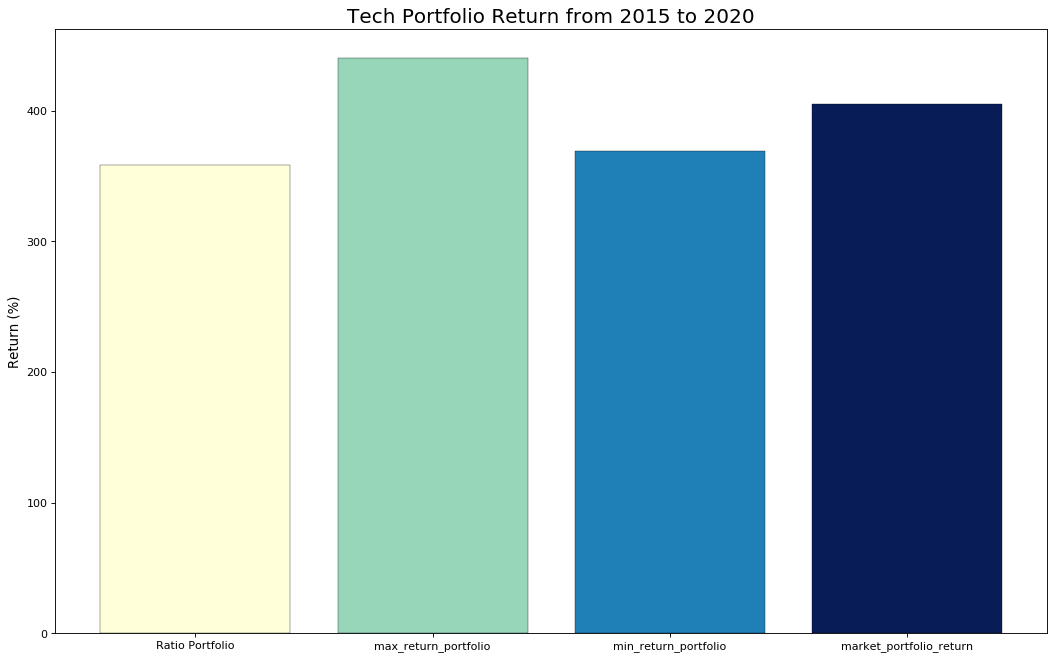

In [132]:
# Create a bar chart to display the returns of the Portfolios
cmap = plt.get_cmap('YlGnBu')
colors = [cmap(x) for x in np.linspace(0, 1, 4)]
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(actual_returns_dataframe['Portfolio'],actual_returns_dataframe['Return'], color = colors, edgecolor = 'black',
        linewidth = 0.3)
plt.ylabel('Return (%)', fontsize = 12)
plt.title('Tech Portfolio Return from 2015 to 2020', fontsize = 18)

We can see that the only portfolio that has outperformed the market portfolio for these tech stocks is the max return portfolio. We can also see the portfolio was supposed to offer the greatest return for a given amount of risk has performed the worst. Despite this, all portfolios have performed well with even the poorest performer offering a return of 329% over the 5-year period. None the less it is disappointing that the ratio portfolio has performed poorly compared to the min return portfolio and the market portfolio.

Let's look at why the ratio portfolio has both underperformed the min return portfolio and the market portfolio.

To look at why the portfolios have performed as they have, we will create a graph to display the returns of the 6 tech stocks from 2015 to 2020.

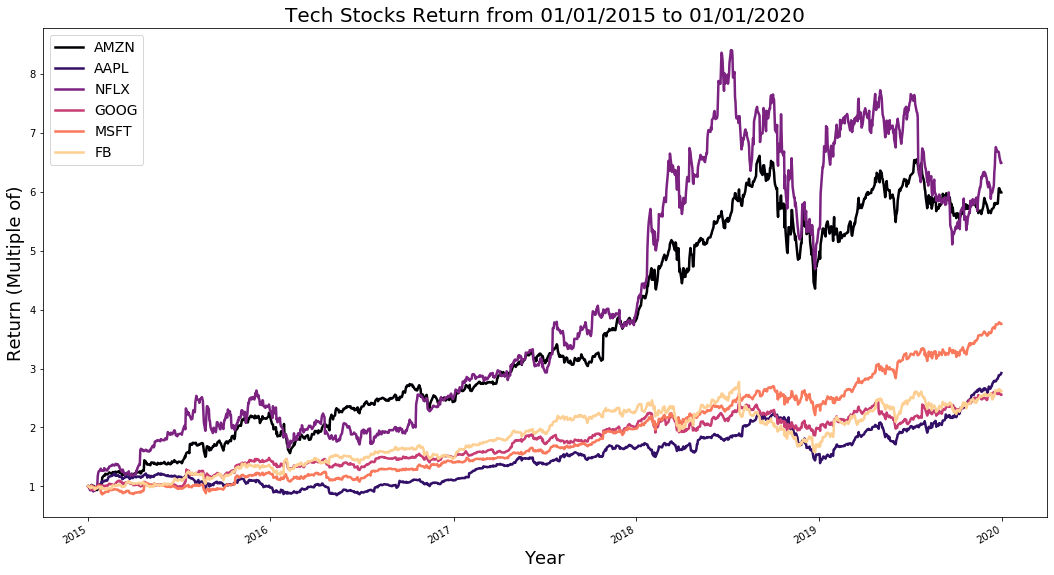

In [133]:
# The data is first normalised to 1 by dividing the rows in the data frame by the first row
tech_data_1 = tech_data_1/tech_data_1.iloc[0]

# After normalisation the data can then be plotted on a line graph to indicate whether the value of the stock
# has increased or decreased. If the value of the stock has increased, we would see a value above 1 if the
# value of the stock has decreased we would see a value of less than 1 on the graph.
cmap = plt.get_cmap('magma')
colors = [cmap(x) for x in np.linspace(0, 0.9, 6)]
tech_data_1.plot(figsize = (18, 10), color = colors, linewidth=2.5)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Return (Multiple of)', fontsize = 18)
plt.title("Tech Stocks Return from 01/01/2015 to 01/01/2020", fontsize = 20)
plt.legend(loc="upper left",
           prop={'size': 14}, 
           )
plt.show()

From the Tech Stocks Return from 01/01/2015 to 01/01/2020 graph we can see that Amazon and Netflix offered the greatest returns over the 5-year period. Both offered returns around 6x. The next best performer was Microsoft which offered returns of around 4x. The three other stocks all offered returns of about 2x.

It therefore stands that portfolios that contained a large amount of Netflix and Amazon stock would have vastly outperformed any other portfolio. Our max return portfolio was largely made up of Netflix stock (52.9%) and so has performed well and beaten the market portfolio even though it does contain a large amount Apple stock and only a small proportion of Amazon stock.

But this also explains why our ratio portfolio has performed so poorly. Apple made up 58.1% of thi portfolio due to it very large returns from 2005 to 2015. The return on Apple stock was similar to the return on Netflix stock in this period but Apple was far less volatile than Netflix and so offered a much greater return to risk ratio and therefore Apple stock outweighs Netflix stock in the ratio portfolio.

Microsoft makes up 84.9% of our min return portfolio and Microsoft’s relatively high return compared to Apple, Google and Facebook is the reason why the min return portfolio has outperformed the ratio portfolio.

# Conclusion

Our max ratio portfolio has underperformed the market portfolio. This was not as expected and is disappointing. We have seen that the main reason for this underperformance was because of the portfolios heavy reliance on Apple stock which performed poorly from 2015 to 2020 realtive to its performance from 2005 to 2010. This has shown that we cannot rely solely on the risk to return ratio of a stock when creating a stock. In would have been sensible to put limits on the max composition a stock can make up in the portfolio.

It also worth noting that there are a few other points that are worth noting as to why this example may not truly represent the benefits of  Markowitz Portfolio Optimization. These points are:

- We have only studied six stocks and realistically many more stocks would be considered if using Markowitz Portfolio   Optimization.

- We have only looked at stocks that have all been linked to Tech. We do not have an accurate representation of the different types of companies that exist in an economy. Tech stocks have offered much greater returns and been much more volatile over the last decade or so and as such this may have reduced the effectiveness of the Markowitz.

Despite this we have shown some limitations of the Markowitz Portfolio Optimization model which are useful to bear in mind if the model was to be used again in the future. To further evaluate the Model a case study should be conducted in the future that contains a larger number of stocks and also the stocks of companies from different industries. 

However, the main reason of this project was to develop the authors understanding of Python and Financial concepts and regarding  this the project has been a success.
